In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import itertools
import scipy.stats as scs
import statsmodels.api as sm

In [2]:
from get_clean_data_LinReg import get_data, clean_data, get_feats, get_target, partition_feats_by_ptp_cnt,\
    get_more_feats, partition_more_feats_by_ptp_cnt
from plot_results_and_residuals import plot_results, plot_residuals, plot_student_residuals

<h3>Variable List: </h3>
<ul><li>model_dict : Dictionary of linear regression models fit with 2014 data divided by plan participant count
<li>partitioned_dict_of_df_XX : Dictionary of tuples:<br>X (features matrix): Pandas dataframes of 20XX plan features divided by plan participant count, <br>y (target series): Pandas Series of 20XX+1 actual funding target 
<li>predict_dict_XX : Dictionary of predicted 20XX+1 funding targets (predicted off 20XX features)
<li>student_resids_XX : Dictionary of studentized residuals

<h1>Get training data: 2014 Schedule SB, H and Form 5500 filing fields </h1>
<h3>In dictionary with keys = participant count range (partitions)</h3>

<h3>Features:</h3>
    <ul><li>Prior year funding target
        <li>Prior year target normal cost (expected growth in funding target)
        <li>Prior year benefits paid
        <li>Prior year effective interest rate (single effective rate that approximates the effect of 3-tiered rates actually used to value funding target
    </ul>
<h3>Interaction Features:</h3>
    <ul><li>Effective interst rate x prior year funding target
        <li>Effective interst rate x prior year target normal cost (expected growth in funding target)
        <li>Effective interst rate x prior year benefits paid (1/2 year)
    </ul>

In [3]:
partitioned_dict_of_df_14 = partition_feats_by_ptp_cnt(2014)

In [6]:
partition_list = [(0,300),(300,500),(500,800),(800,1500),(1500,2500),(2500,5000),(5000,10000),(10000,50000),(50000,100000),(100000,500000)]

<b>Number of plans in each partition of data</b>:

In [7]:
for i in partition_list:
    print('{} :'.format(i),len(partitioned_dict_of_df_14[i][0]))

(0, 300) : 1500
(300, 500) : 704
(500, 800) : 593
(800, 1500) : 712
(1500, 2500) : 482
(2500, 5000) : 504
(5000, 10000) : 369
(10000, 50000) : 311
(50000, 100000) : 51
(100000, 500000) : 28


<h1>Create dictionary of linear models (OLS) fitted on 2014 partitioned data</h1>

In [8]:
model_dict = {}
for i in partition_list:
    X, y = partitioned_dict_of_df_14[i]
    model_dict[i] = sm.OLS(y, X, hasconst=False).fit()
    print(model_dict[i].summary())

                            OLS Regression Results                            
Dep. Variable:         fndng_tgt_2015   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.797e+04
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:02:28   Log-Likelihood:                -23676.
No. Observations:                1500   AIC:                         4.736e+04
Df Residuals:                    1497   BIC:                         4.737e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
eir_ft         1.0185      0.006    176.963      0.0

<h1>Create dictionary of linear models (WLS) fitted on 2014 partitioned data</h1>

In [9]:
model_dict_wls = {}
for i in partition_list:
    X, y = partitioned_dict_of_df_14[i]
    model_dict_wls[i] = sm.WLS(y, X, hasconst=False).fit()
    print(model_dict_wls[i].summary())

                            WLS Regression Results                            
Dep. Variable:         fndng_tgt_2015   R-squared:                       0.987
Model:                            WLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.797e+04
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:02:53   Log-Likelihood:                -23676.
No. Observations:                1500   AIC:                         4.736e+04
Df Residuals:                    1497   BIC:                         4.737e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
eir_ft         1.0185      0.006    176.963      0.0

<h1>Test on 2015 data:</h1>
<ul>
    <li>Get data
    <li>create dictionary of predictions
    <li>graph actual values vs predictions
    </ul>

In [10]:
partitioned_dict_of_df_15 = partition_feats_by_ptp_cnt(2015)

<b>Distribution of plan sizes</b>

In [11]:
for i in partition_list:
    print('{} :'.format(i),len(partitioned_dict_of_df_15[i][0]))

(0, 300) : 1466
(300, 500) : 672
(500, 800) : 568
(800, 1500) : 675
(1500, 2500) : 460
(2500, 5000) : 488
(5000, 10000) : 348
(10000, 50000) : 306
(50000, 100000) : 50
(100000, 500000) : 28


In [12]:
predict_dict_15 = {}
studentized_resids_15 = {}
for i in partition_list:
    X, y = partitioned_dict_of_df_15[i]
    predict_dict_15[i] = model_dict[i].predict(X)
    studentized_resids_15[i] = model_dict[i].outlier_test()

In [13]:
predict_dict_wls_15 = {}
scores_wls_15 = []
for i in partition_list:
    X, y = partitioned_dict_of_df_15[i]
    predict_dict_wls_15[i] = model_dict_wls[i].predict(X)

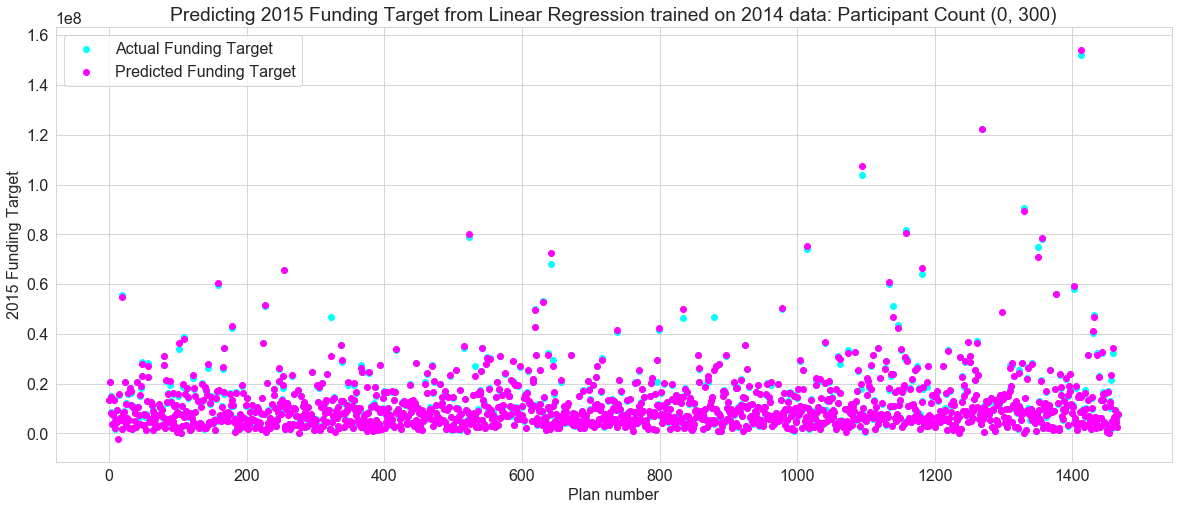

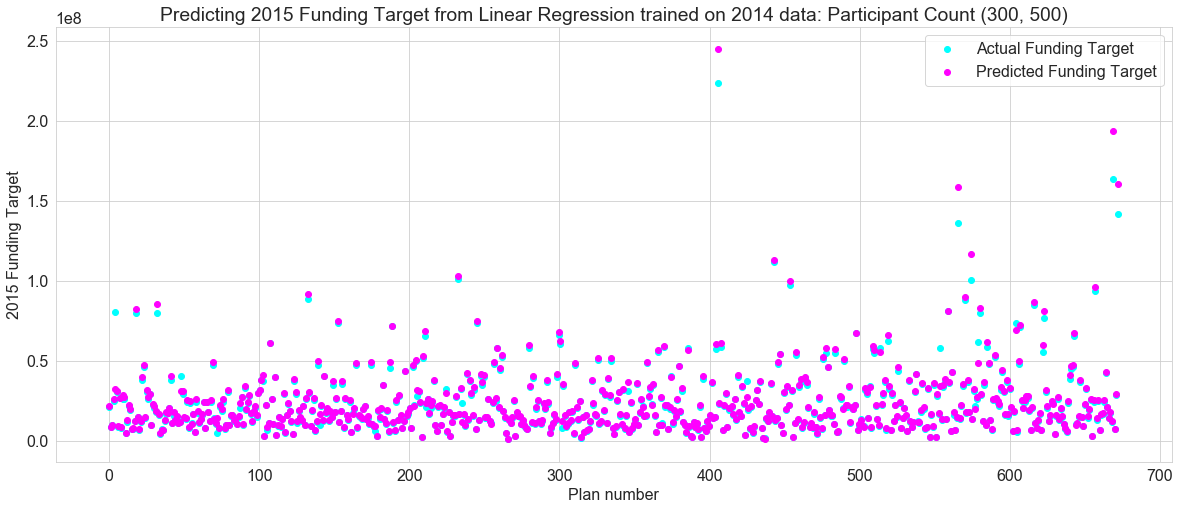

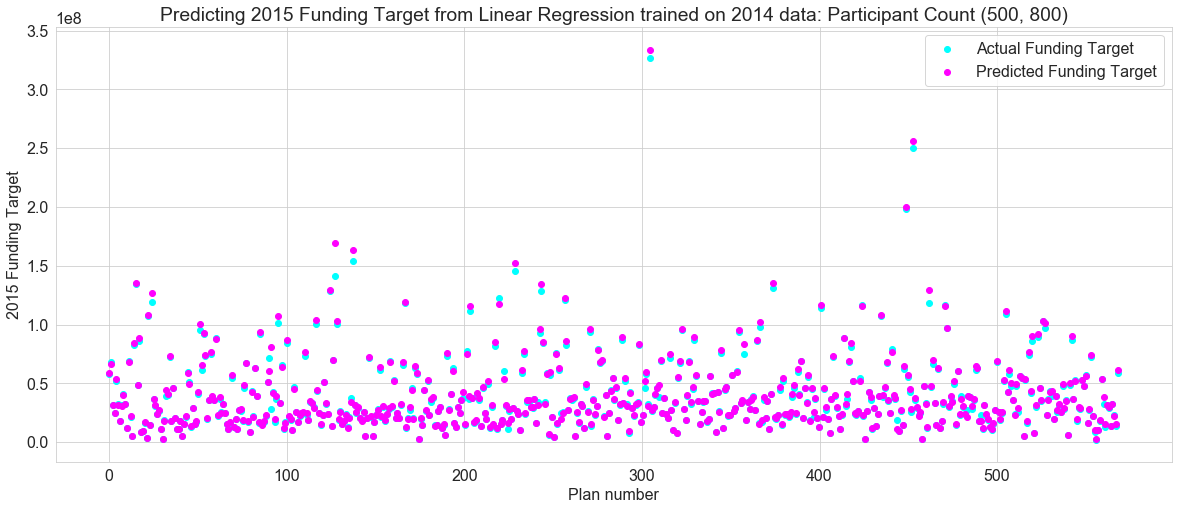

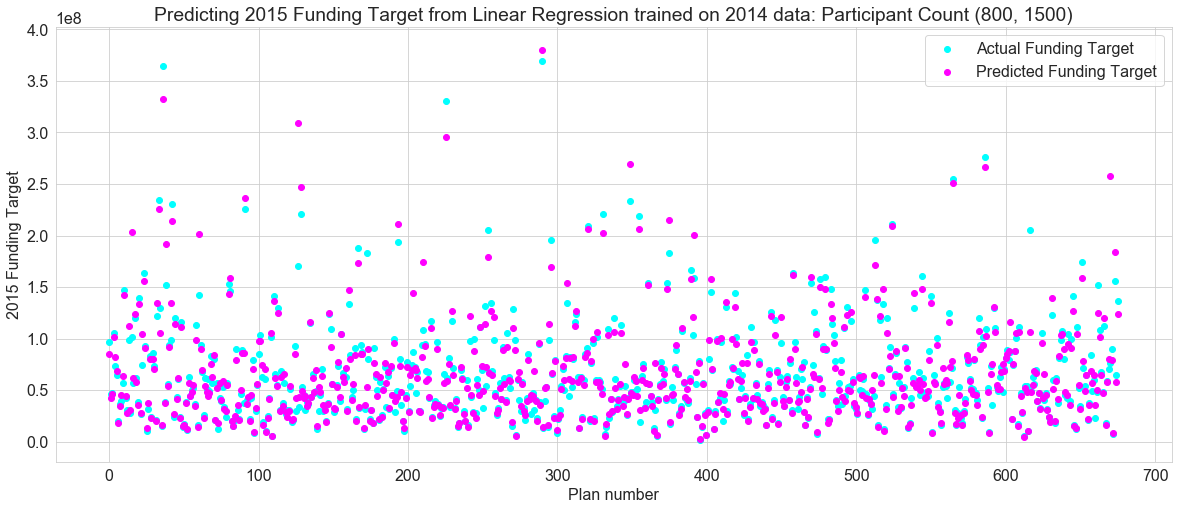

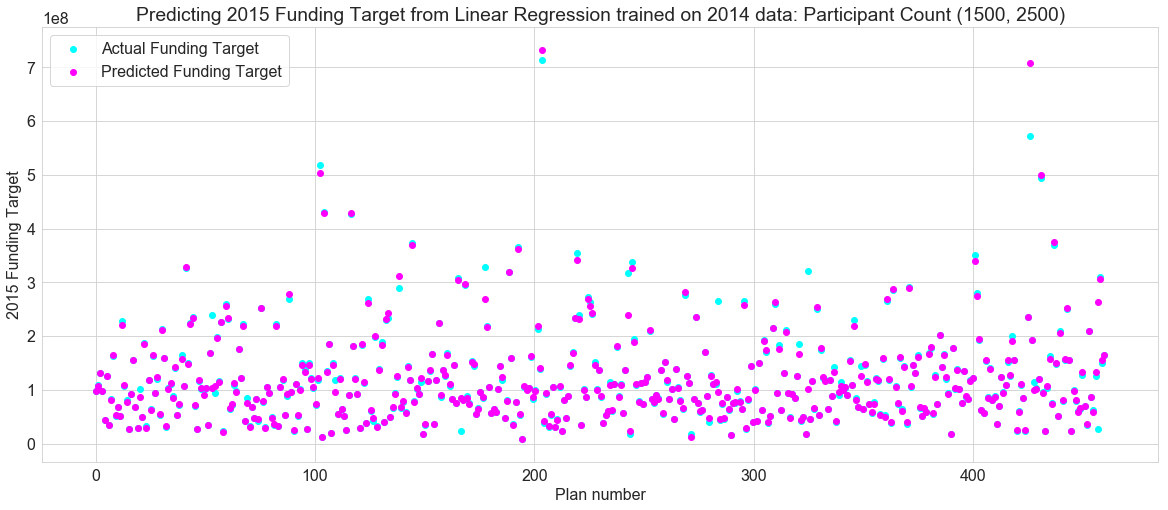

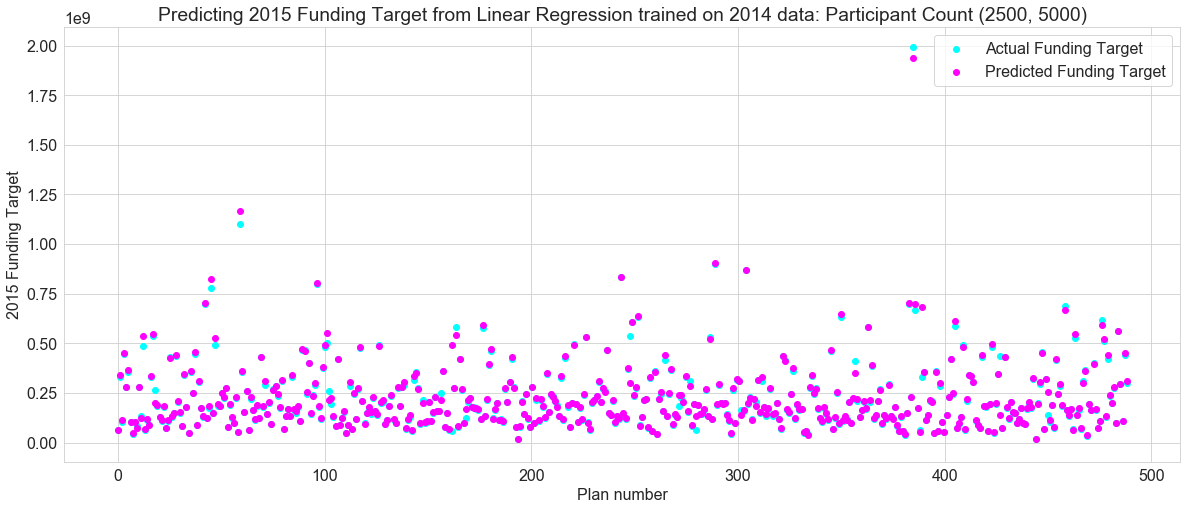

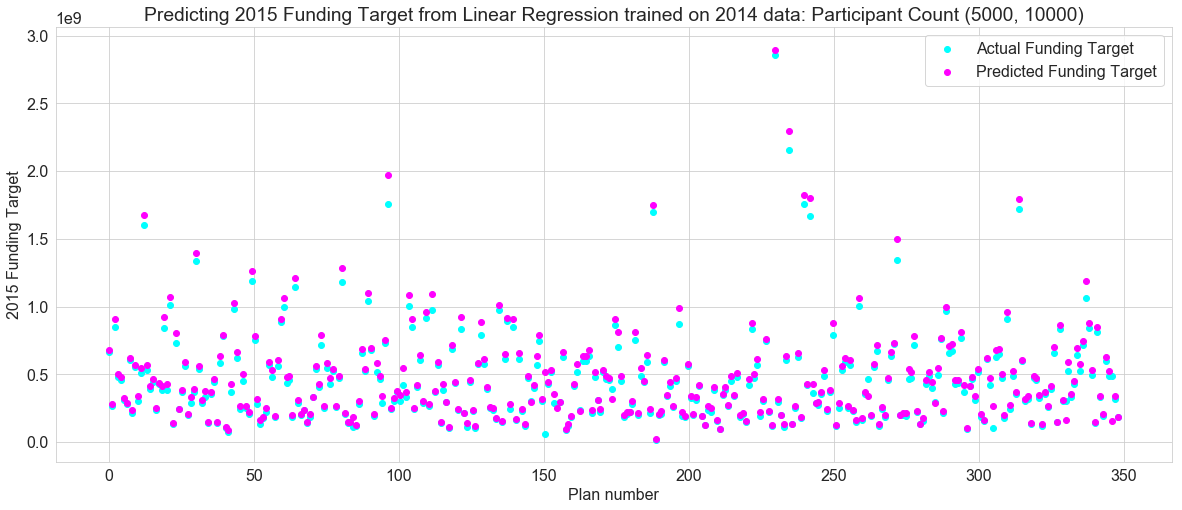

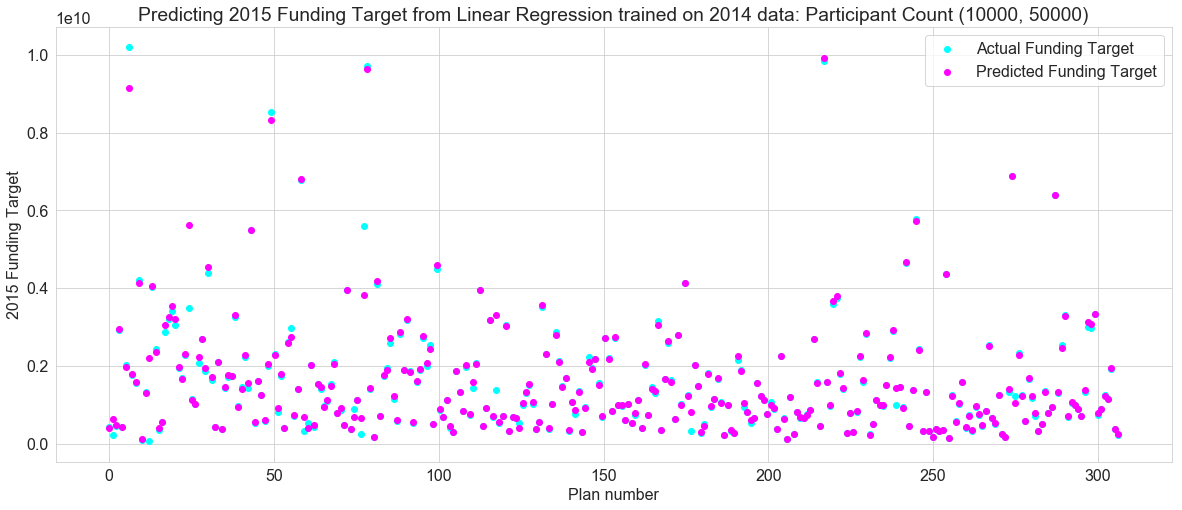

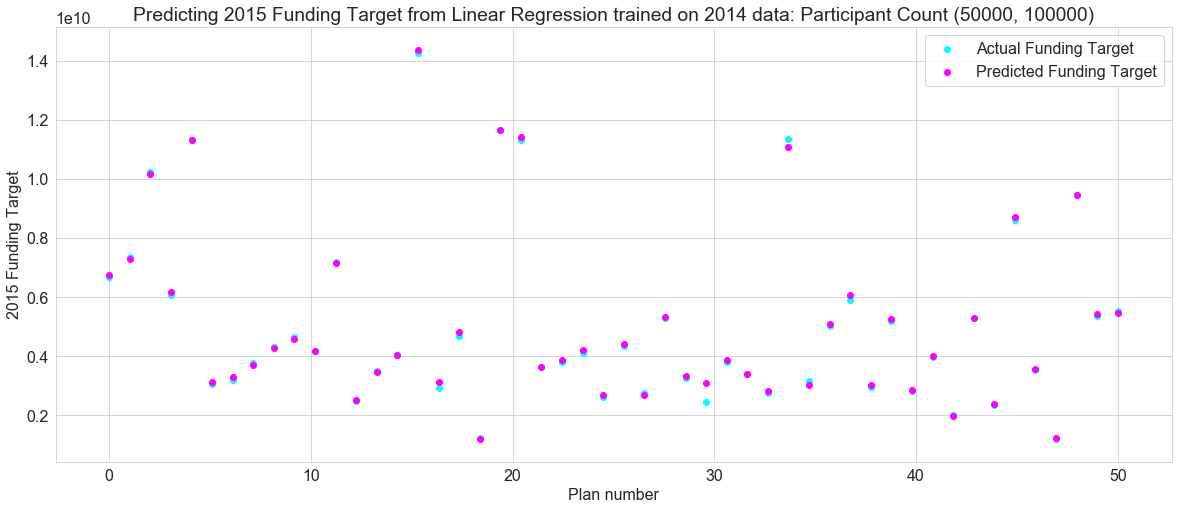

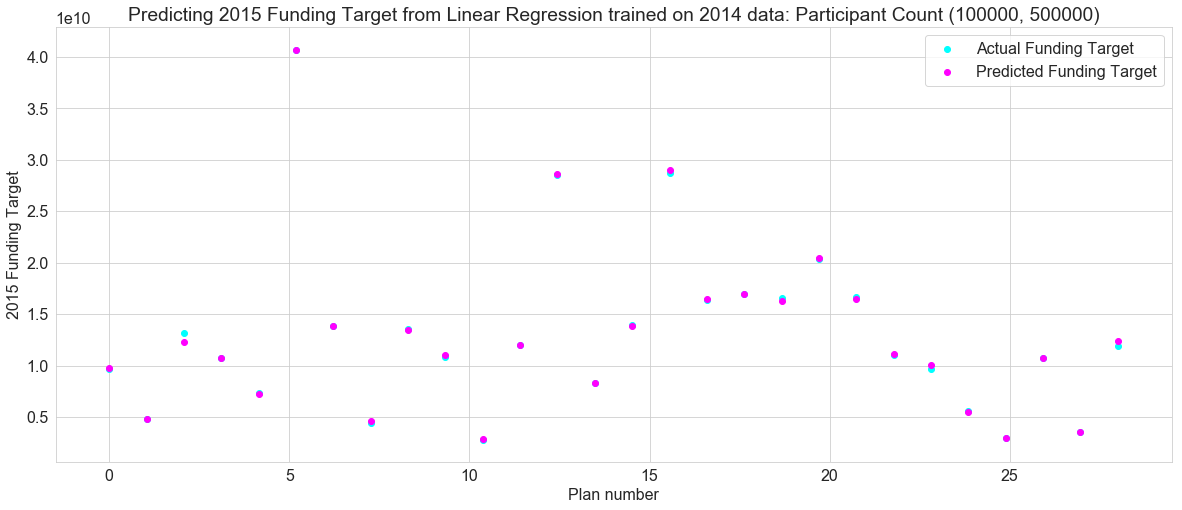

In [14]:
for i in partition_list:
    y_true = partitioned_dict_of_df_15[i][1]
    y_pred = predict_dict_15[i]
    plot_results(y_true, y_pred, i, 2015)

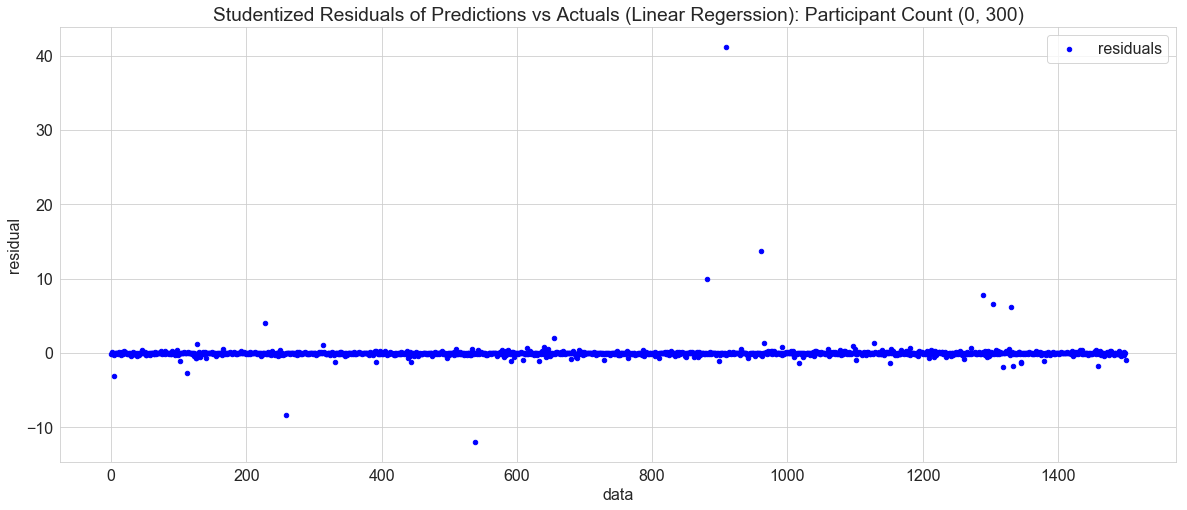

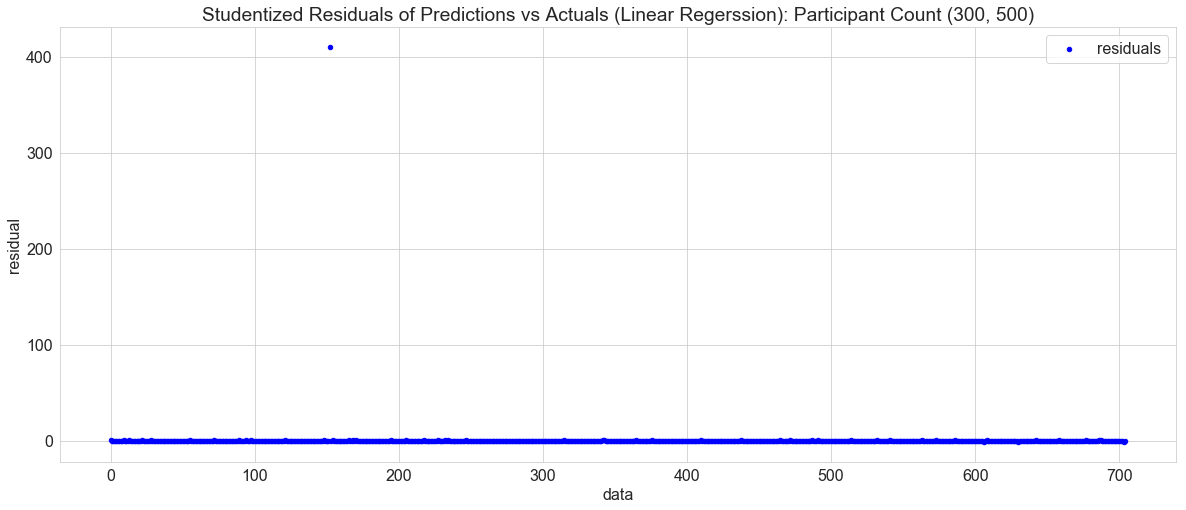

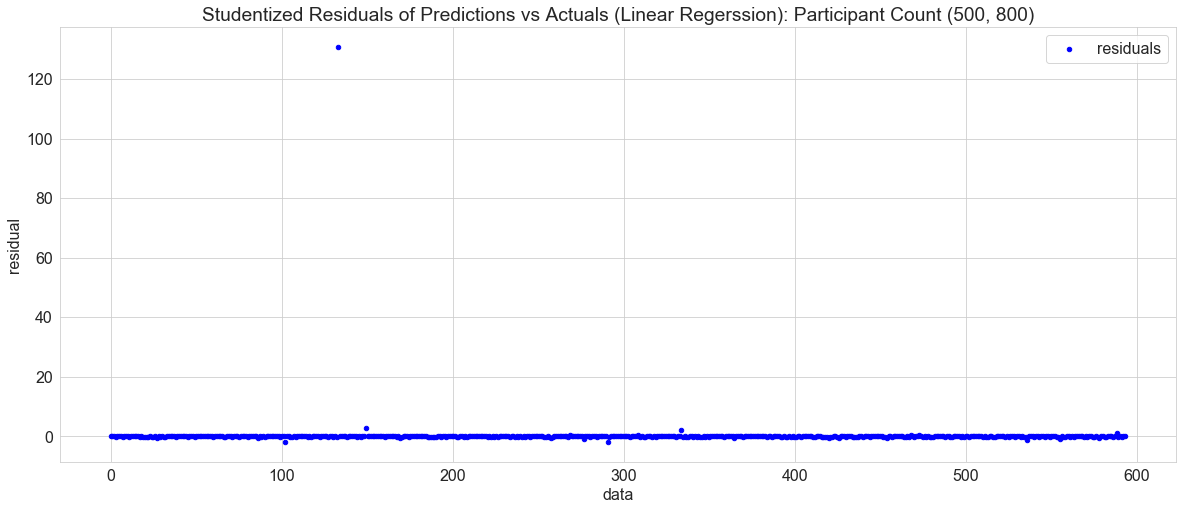

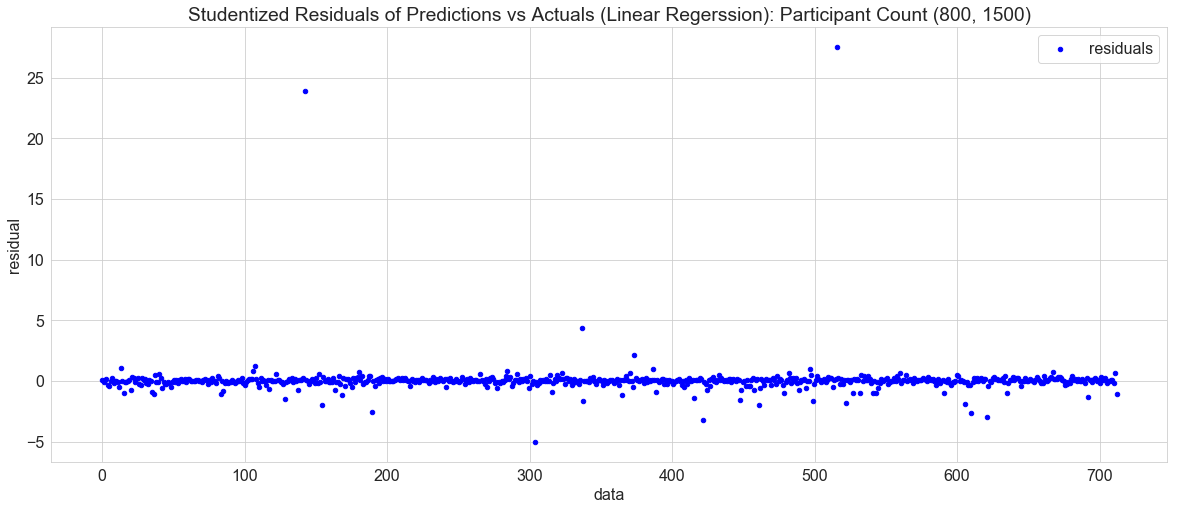

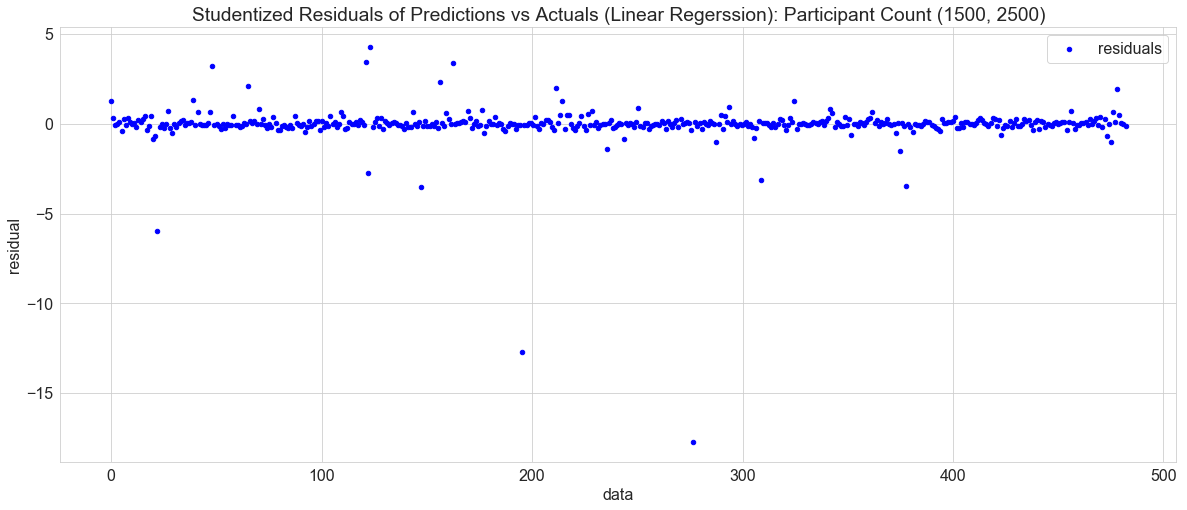

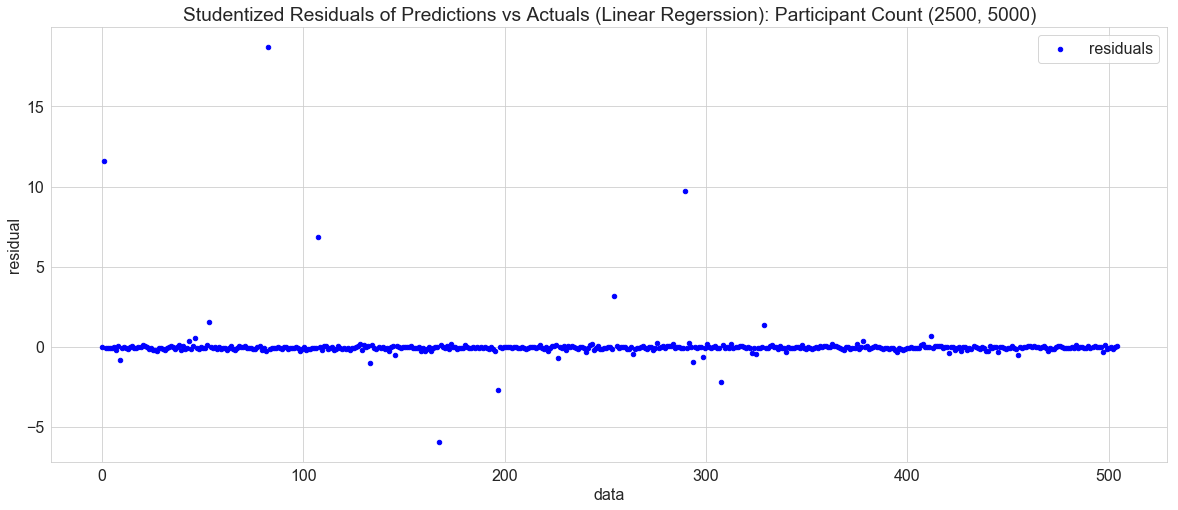

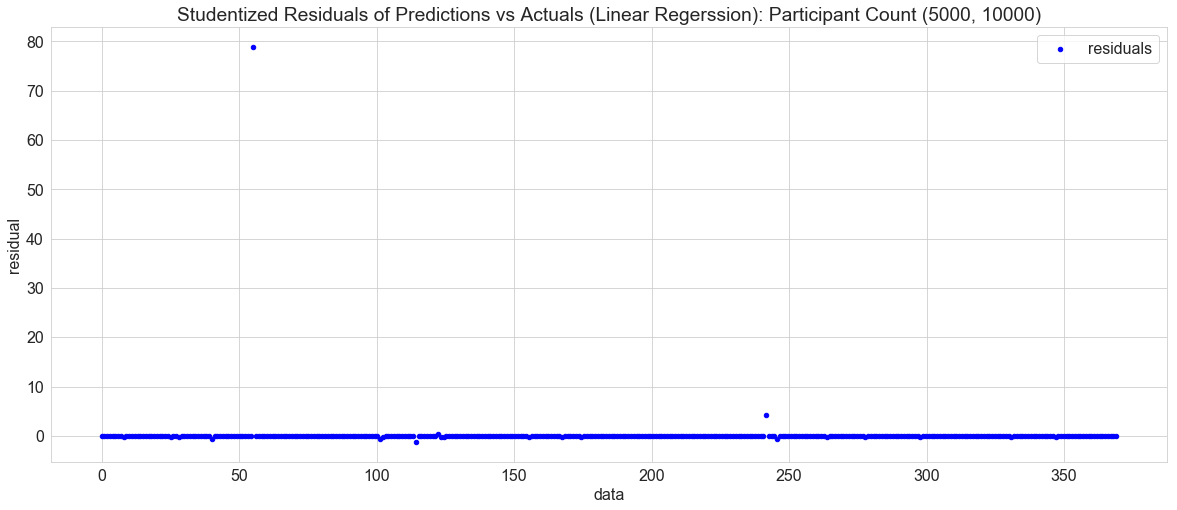

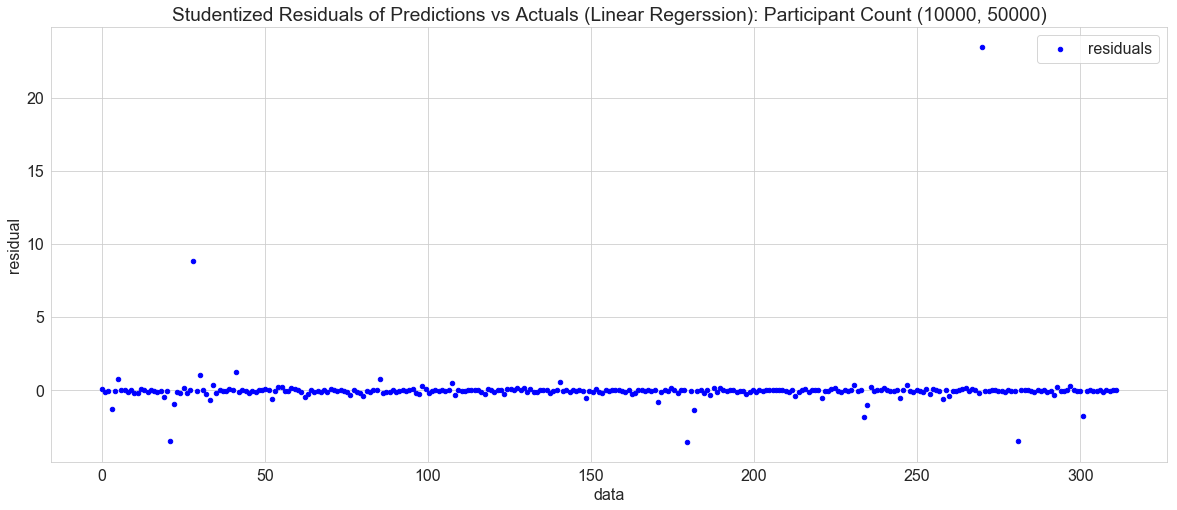

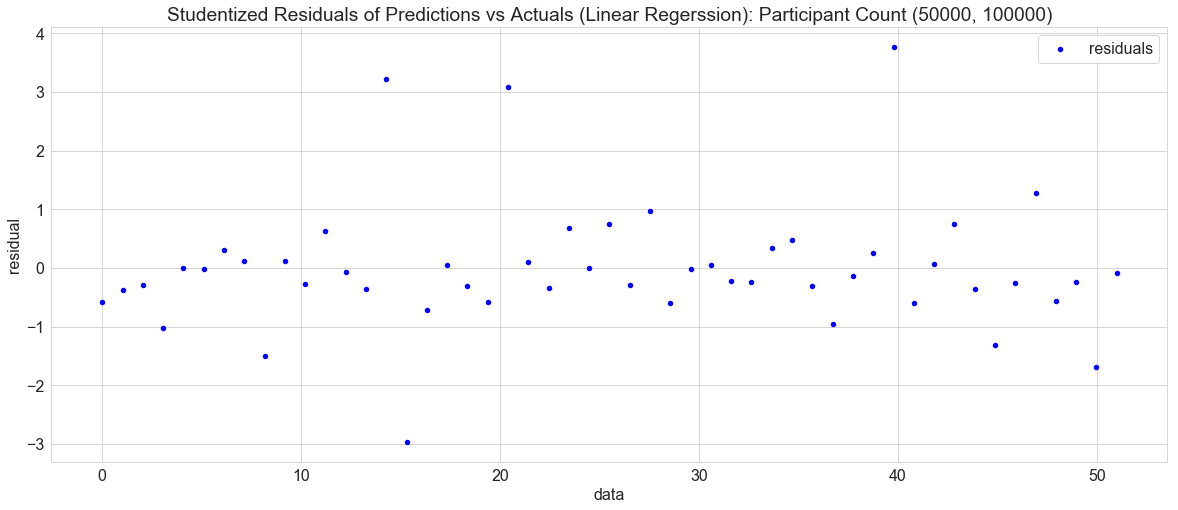

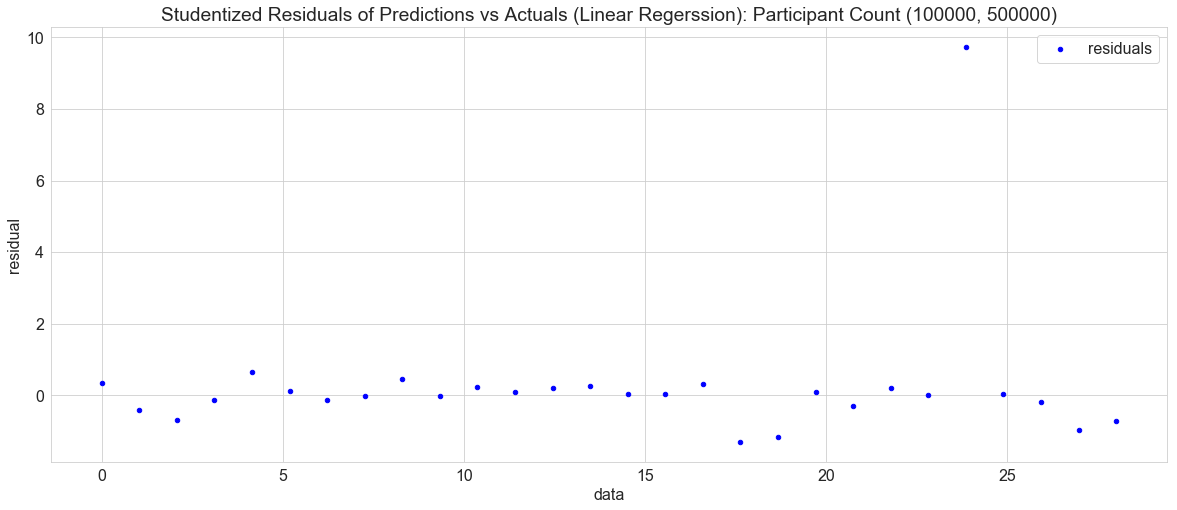

In [16]:
for i in partition_list:
    plot_student_residuals(studentized_resids_15[i]['student_resid'], i)

<h1>Test on 2016 data:</h1>
<ul>
    <li>Get data
    <li>create dictionary of predictions
    <li>graph actual values vs predictions
    </ul>

In [17]:
partitioned_dict_of_df_16 = partition_feats_by_ptp_cnt(2016)

In [18]:
for i in partition_list:
    print('{} :'.format(i),len(partitioned_dict_of_df_16[i][0]))

(0, 300) : 221
(300, 500) : 81
(500, 800) : 49
(800, 1500) : 52
(1500, 2500) : 38
(2500, 5000) : 31
(5000, 10000) : 23
(10000, 50000) : 20
(50000, 100000) : 5
(100000, 500000) : 3


In [19]:
predict_dict_16 = {}
studentized_resids_16 = {}
for i in partition_list:
    X, y = partitioned_dict_of_df_16[i]
    predict_dict_16[i] = model_dict[i].predict(X)
    studentized_resids_16[i] = model_dict[i].outlier_test()

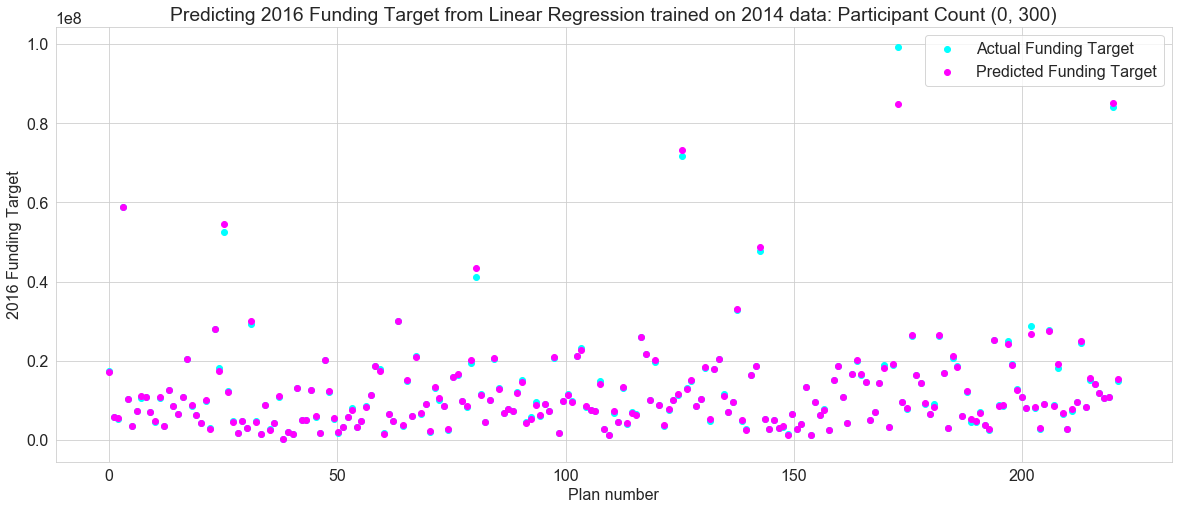

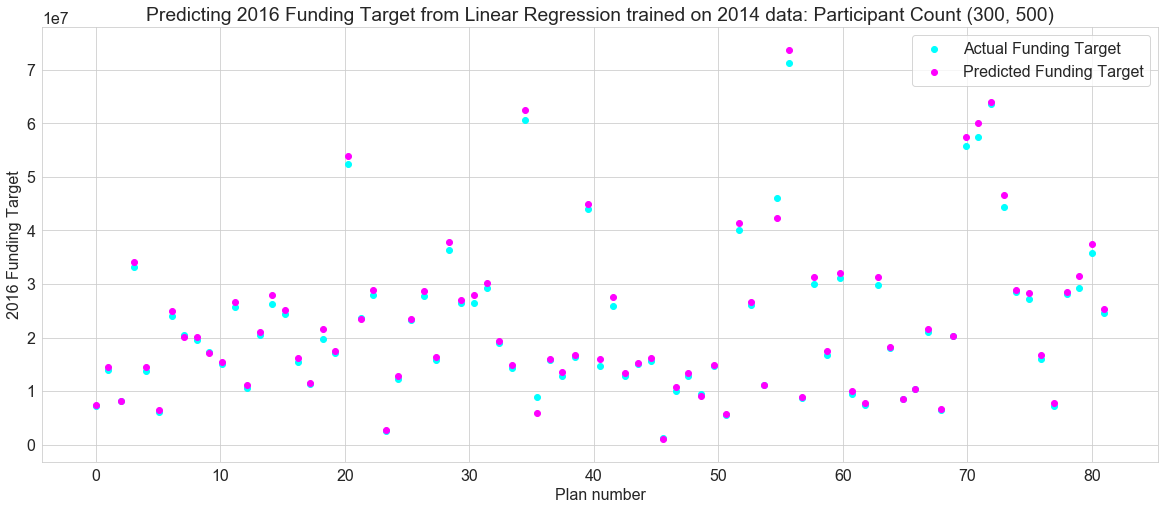

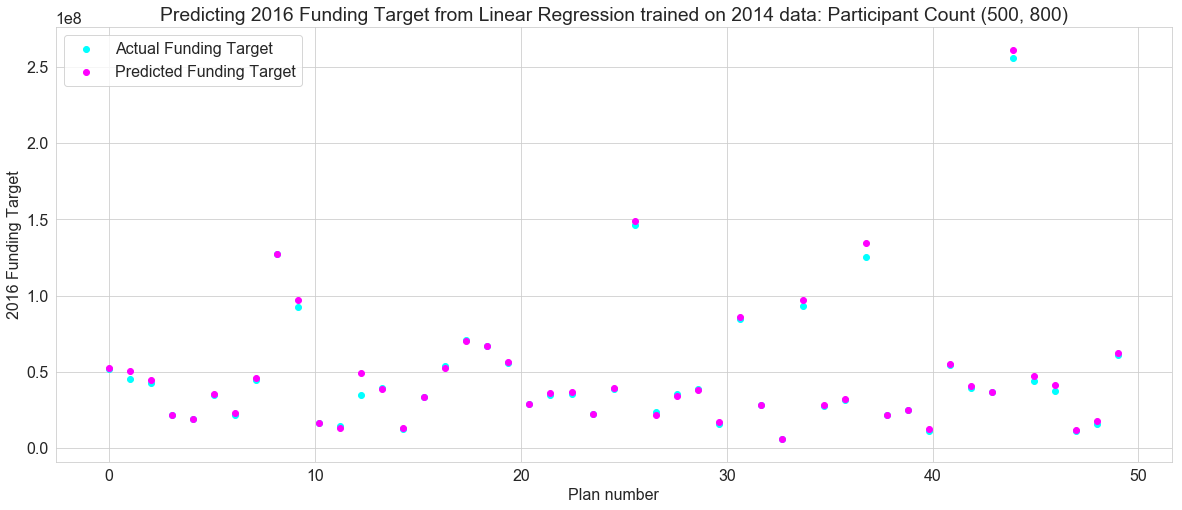

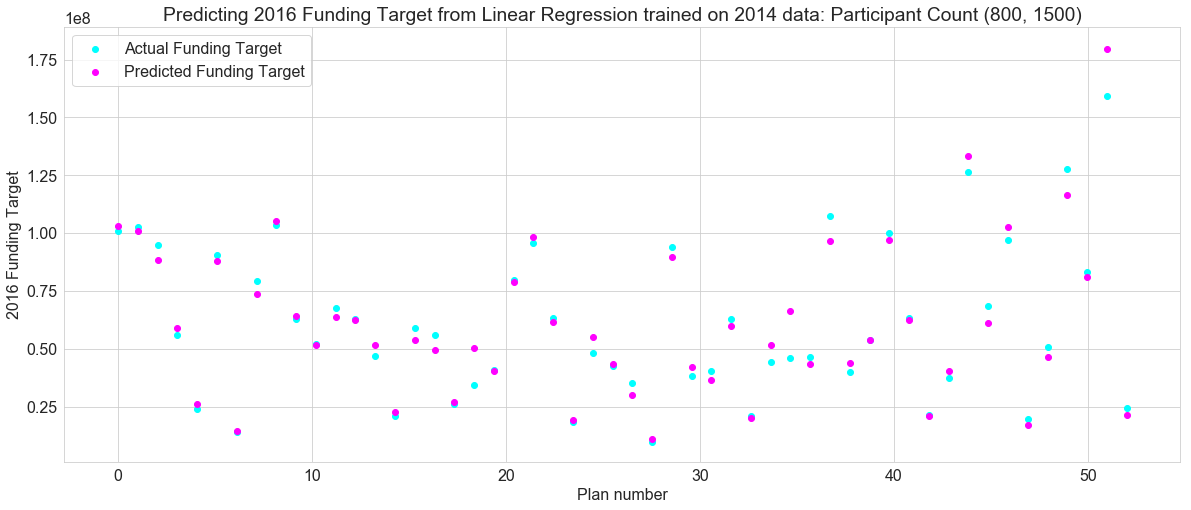

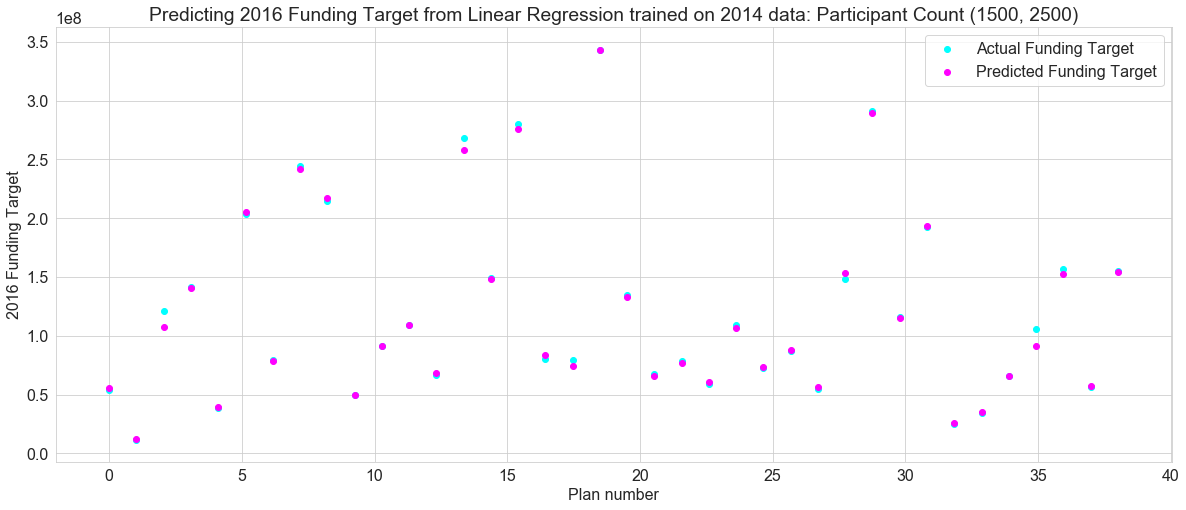

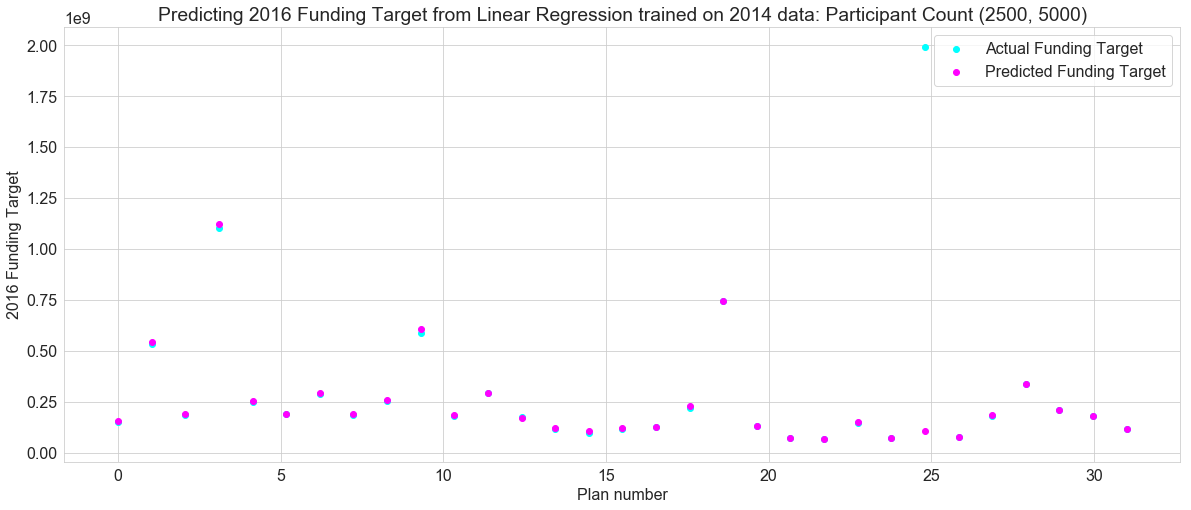

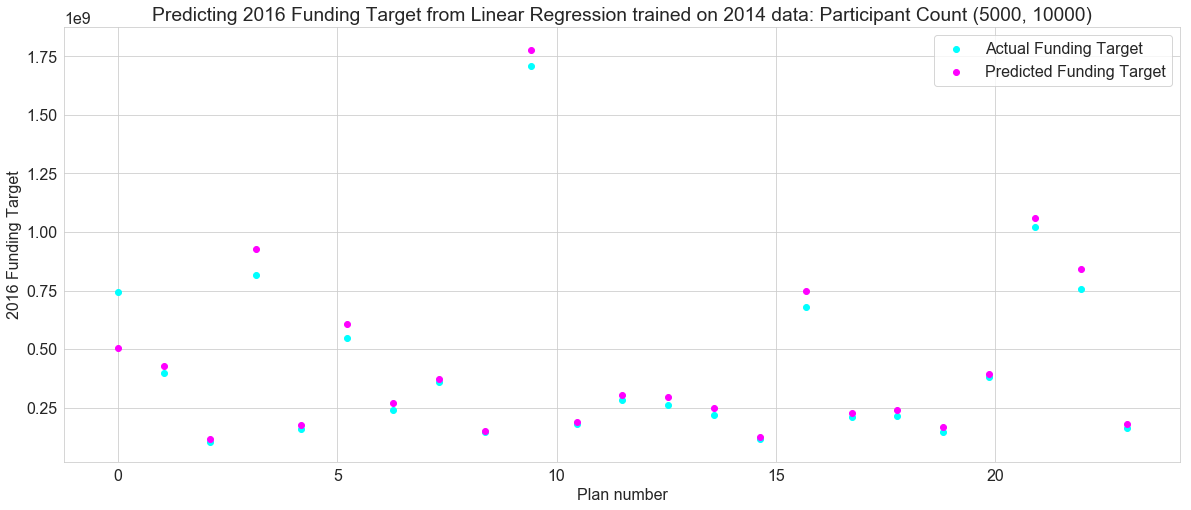

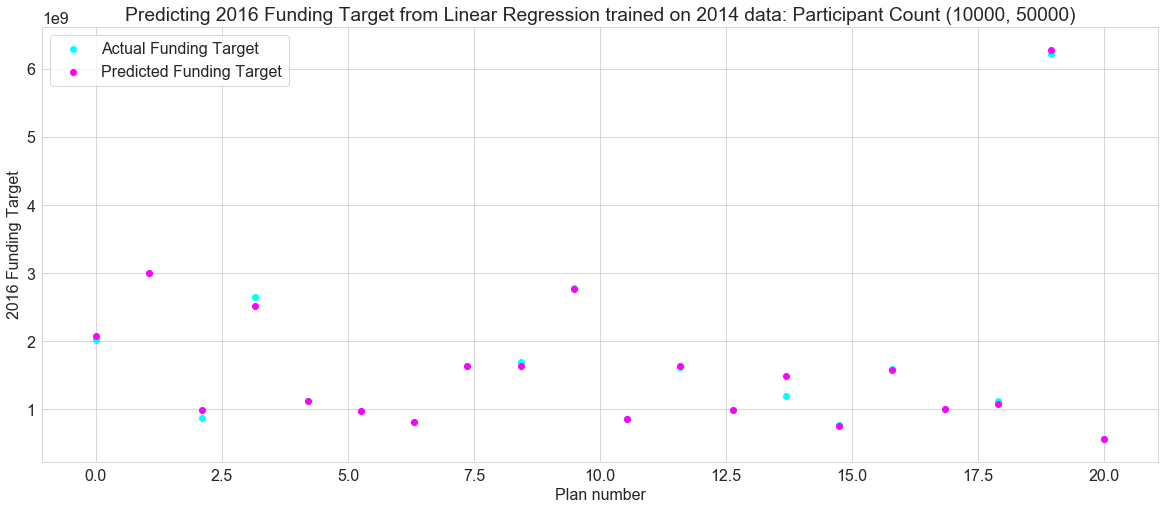

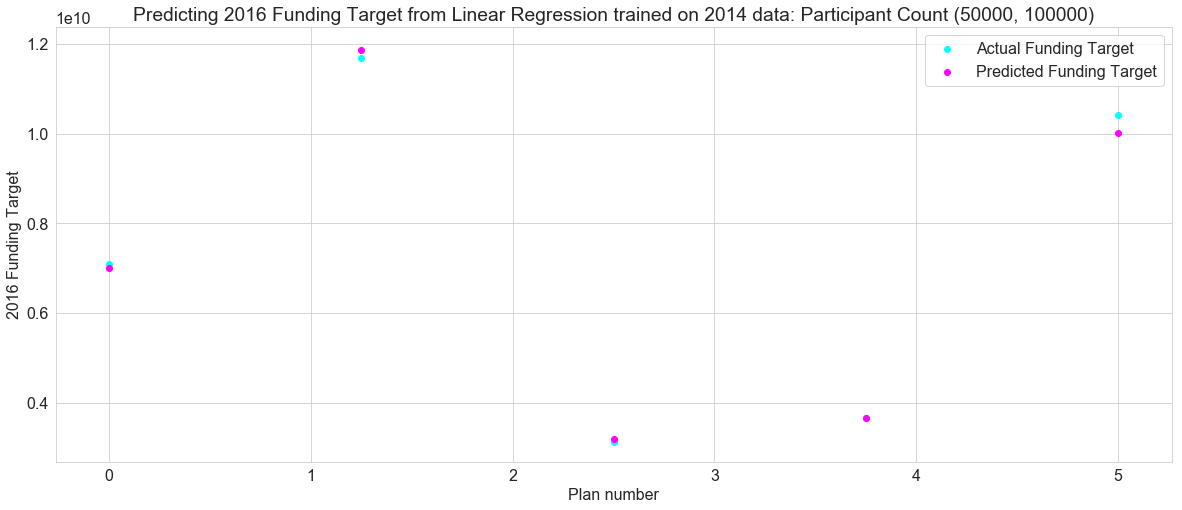

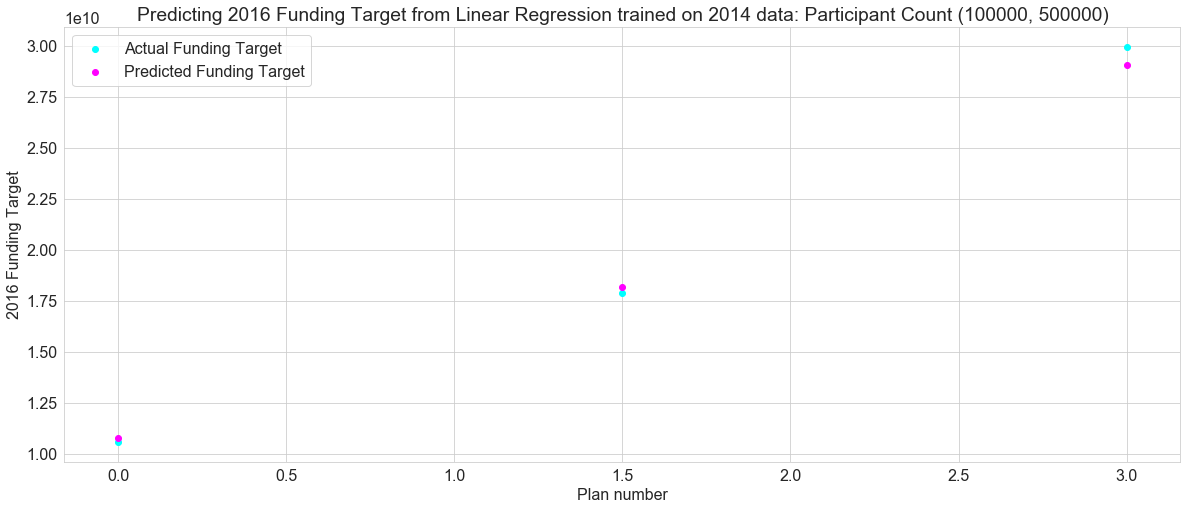

In [20]:
for i in partition_list:
    y_true = partitioned_dict_of_df_16[i][1]
    y_pred = predict_dict_16[i]
    plot_results(y_true, y_pred, i, 2016)

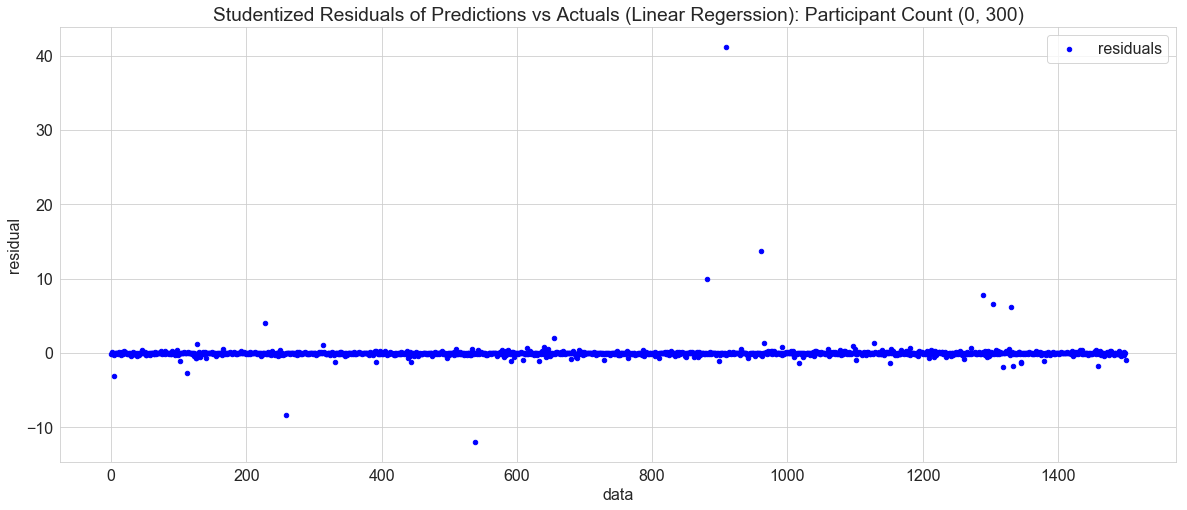

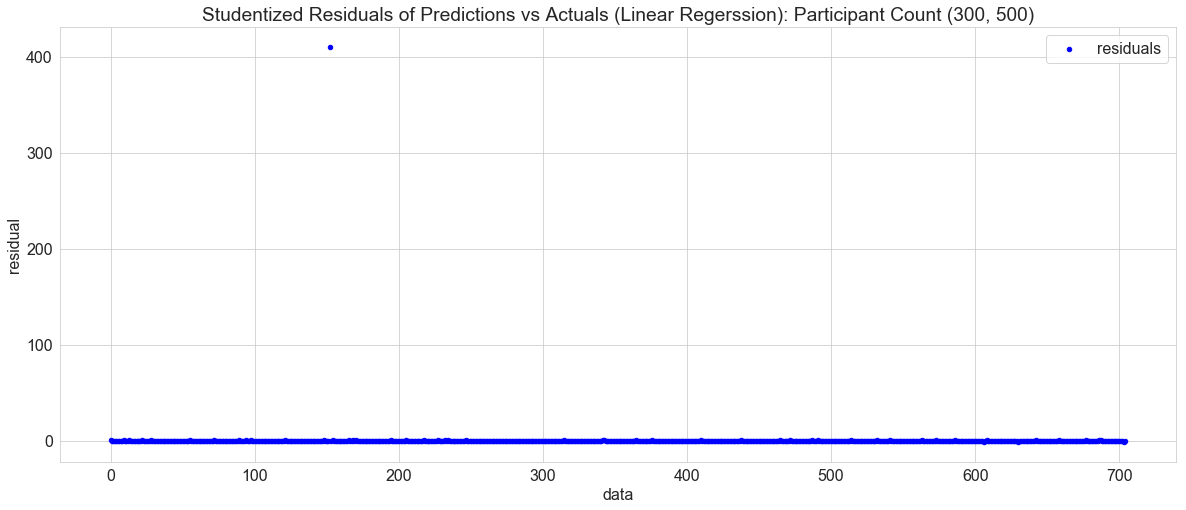

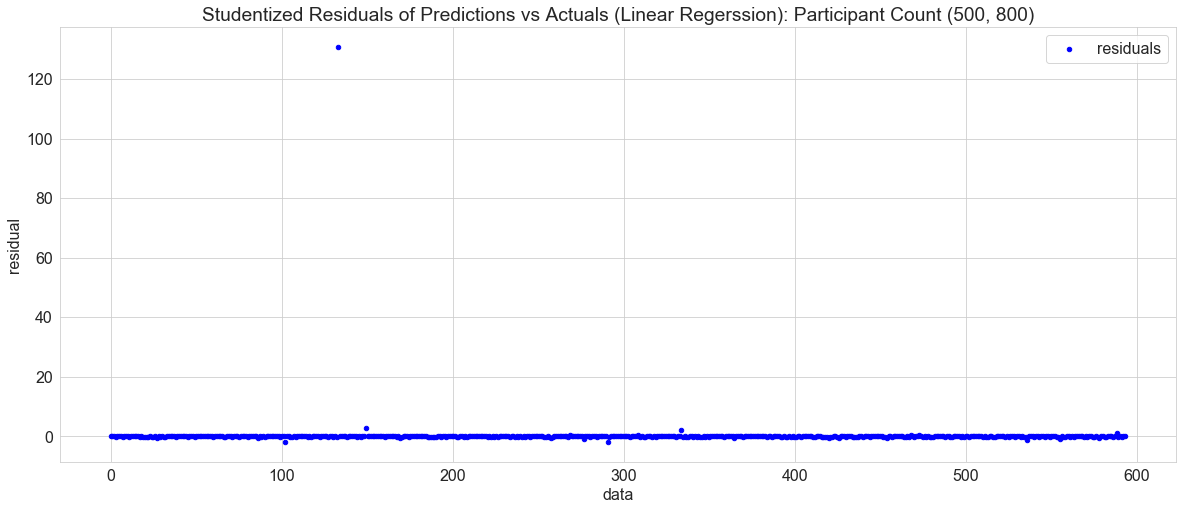

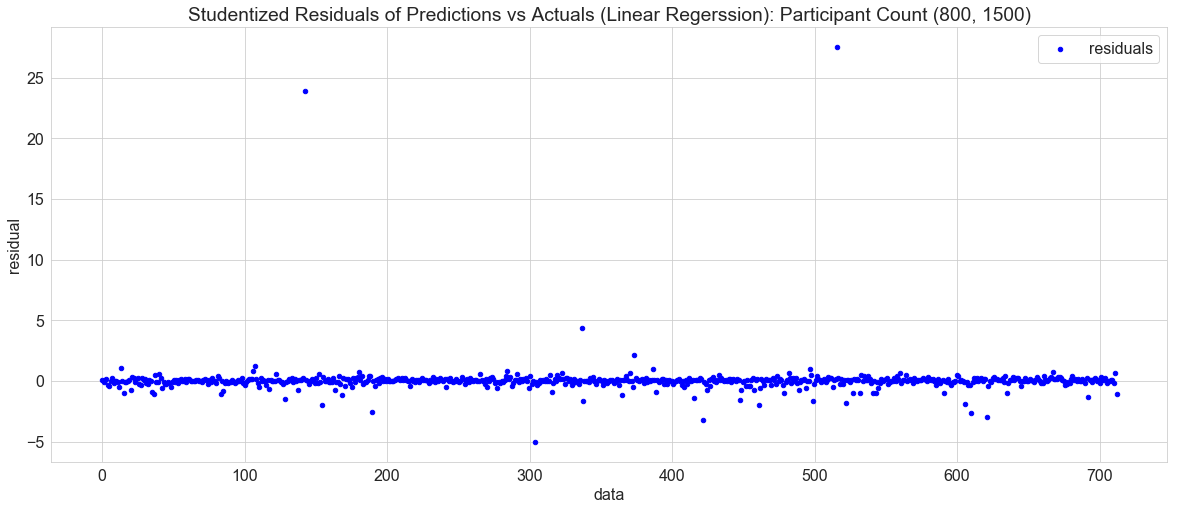

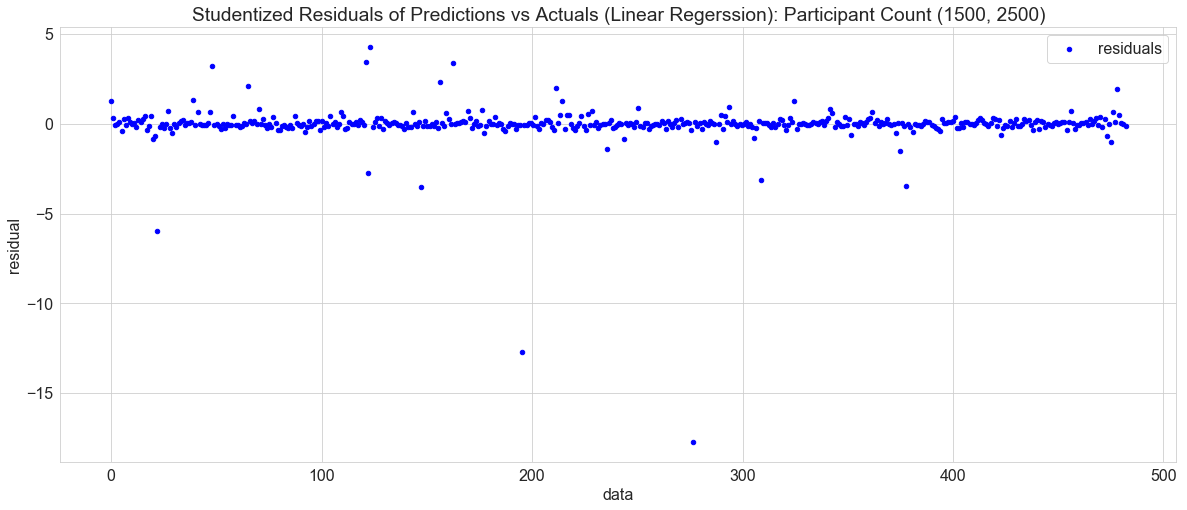

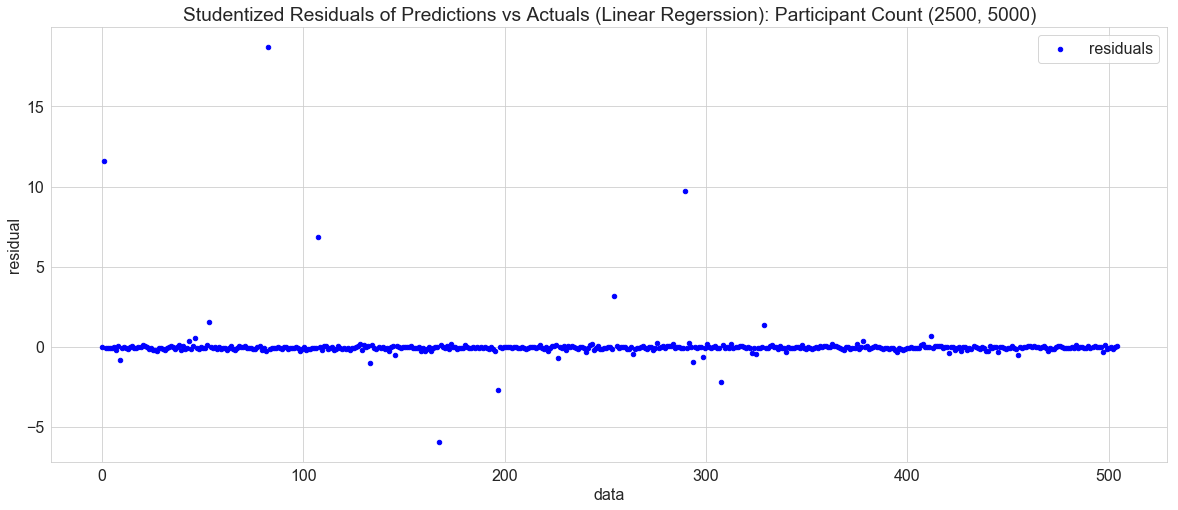

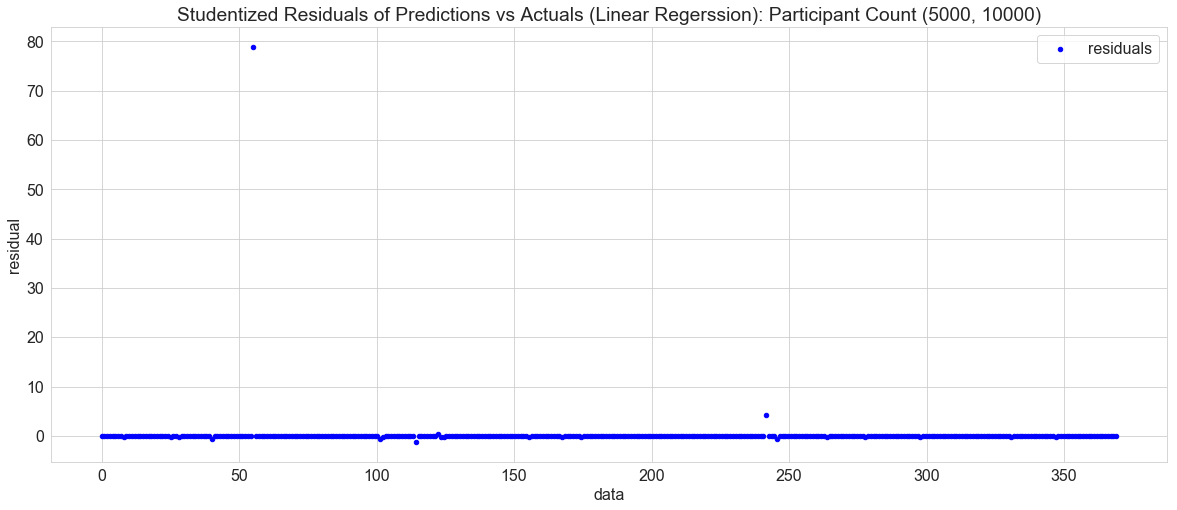

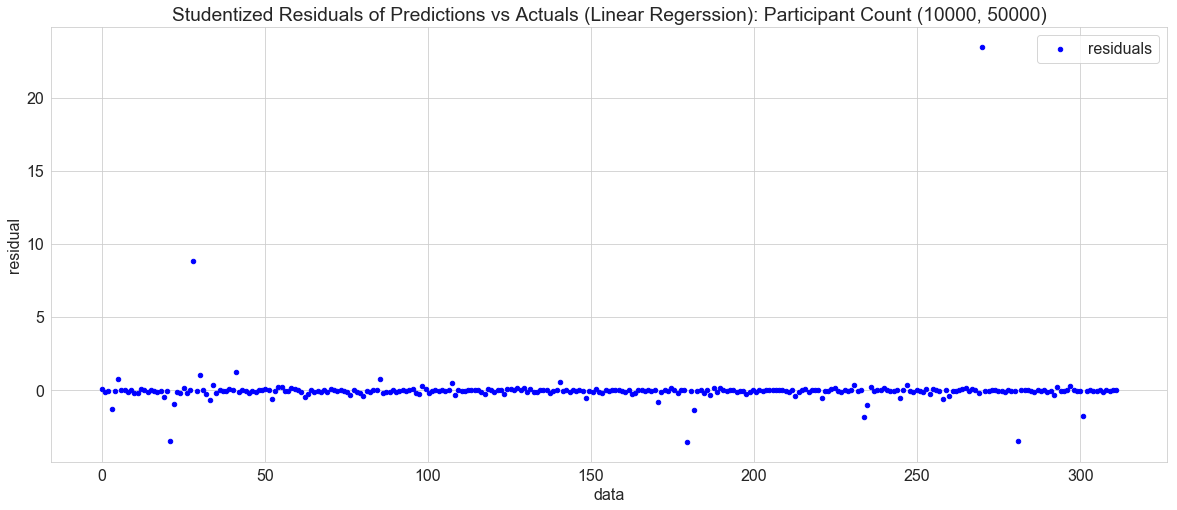

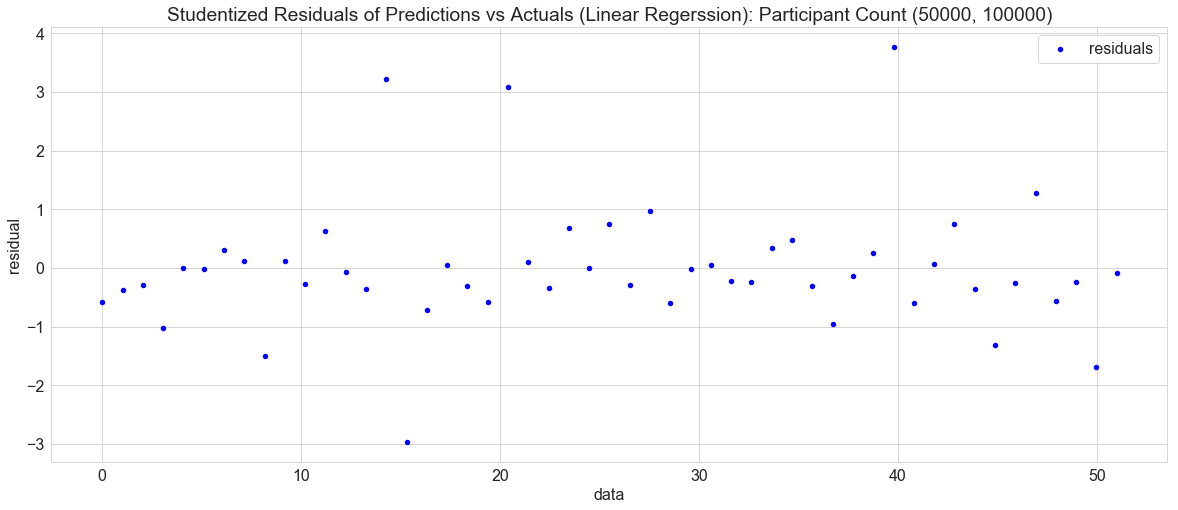

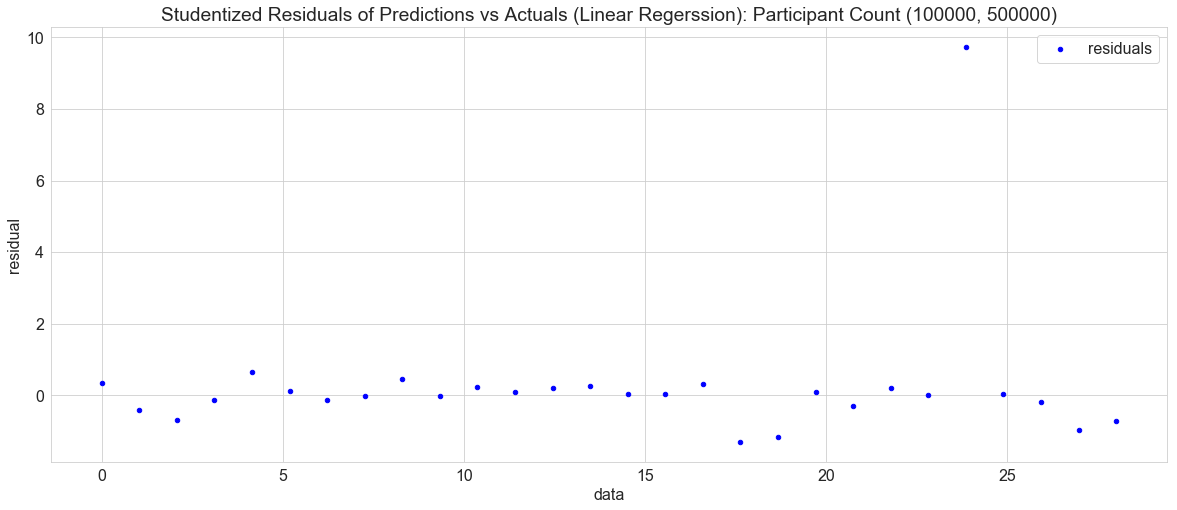

In [21]:
for i in partition_list:
    plot_student_residuals(studentized_resids_16[i]['student_resid'], i)